<h2>Aluno</h2>
<h3>Fernando Araujo Alves Filho</h3>
----------------------------------------------------------------
<h2>Matrícula</h2>
<h3>1915080063</h3>

# imports e Funções

In [17]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import os
from get_palette import ImageProcessor
from PIL import Image


In [18]:
def mostrar_imagem(img, nome:str):
    if img is None:
        print(f"Erro")
        return
    cv2.imshow(nome, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

def obter_caracteristicas_e_histogramas(imagem, pasta_destino):
    tamanho = imagem.shape[:2]
    gamute = np.amax(imagem) - np.amin(imagem)
    canais_rgb = cv2.split(imagem)

    plt.figure(figsize=(9, 9))

    for i, canal in enumerate(canais_rgb):
        cores = ['Blue', 'Green', 'Red']
        plt.hist(canal.ravel(), bins=256, range=[0, 256], color=cores[i], alpha=0.7)
        plt.title(f'Histograma Canal {i+1}')
        plt.xlabel('Intensidade')
        plt.ylabel('Frequência')

    caminho_histograma = os.path.join(pasta_destino, 'histograma.jpg')
    plt.savefig(caminho_histograma)

    plt.show()

    print(f"Tamanho da Imagem: {tamanho}")
    print(f"Gamute: {gamute}")
    print(f"Gráfico de histograma salvo em:\n- {caminho_histograma}")
    return None
    
def realce_contraste(image, output):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    realce_contraste = cv2.equalizeHist(gray_image)
    cv2.imwrite(output, realce_contraste)
    return None

def decomposicao_RGB(path, out_path):
    imagem = Image.open(path)

    canal_vermelho, canal_verde, canal_azul = imagem.split()

    imagem_vermelha = Image.merge("RGB", (canal_vermelho, Image.new("L", canal_vermelho.size, 0), Image.new("L", canal_vermelho.size, 0)))
    imagem_verde = Image.merge("RGB", (Image.new("L", canal_verde.size, 0), canal_verde, Image.new("L", canal_verde.size, 0)))
    imagem_azul = Image.merge("RGB", (Image.new("L", canal_azul.size, 0), Image.new("L", canal_azul.size, 0), canal_azul))


    imagem_vermelha.save(f"{out_path}_vermelha.jpg")
    imagem_verde.save(f"{out_path}_verde.jpg")
    imagem_azul.save(f"{out_path}_azul.jpg")

# Pessoa

In [19]:
person_path = './images/pessoa.jpg'
person = cv2.imread(person_path)
mostrar_imagem(person, 'pessoa')

## Características da Imagem

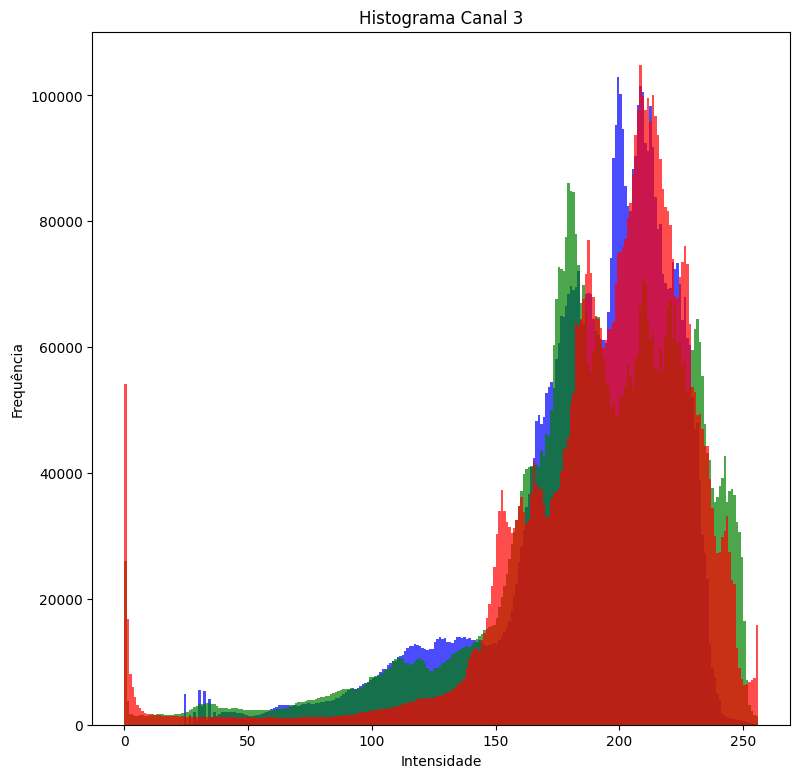

Tamanho da Imagem: (2856, 2142)
Gamute: 255
Gráfico de histograma salvo em:
- ./Graficos/Pessoa/histograma.jpg
Color: (192, 192, 192) - Area: 42.27%
Color: (192, 192, 128) - Area: 6.04%
Color: (192, 128, 128) - Area: 4.28%
Color: (128, 128, 128) - Area: 18.39%
Color: (128, 192, 128) - Area: 0.68%
Color: (128, 128, 64) - Area: 0.07%
Color: (128, 64, 64) - Area: 0.24%
Color: (64, 64, 64) - Area: 1.76%
Color: (64, 0, 0) - Area: 1.09%
Color: (64, 128, 64) - Area: 0.01%
Color: (64, 64, 0) - Area: 0.28%
Color: (0, 0, 0) - Area: 1.38%
Color: (64, 0, 64) - Area: 0.30%
Color: (128, 64, 128) - Area: 0.71%
Color: (0, 64, 0) - Area: 0.00%
Color: (64, 128, 128) - Area: 0.15%
Color: (0, 64, 64) - Area: 0.00%
Color: (128, 128, 192) - Area: 15.49%
Color: (64, 64, 128) - Area: 3.99%
Color: (0, 0, 64) - Area: 0.01%
Color: (128, 192, 192) - Area: 1.56%
Color: (192, 128, 192) - Area: 1.21%
Color: (192, 128, 64) - Area: 0.00%
Color: (128, 64, 0) - Area: 0.01%
Color: (128, 64, 192) - Area: 0.05%
Color: (64,

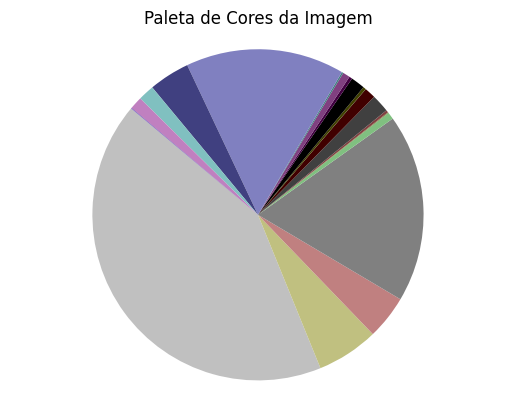

In [20]:
obter_caracteristicas_e_histogramas(person, './Graficos/Pessoa/')
image_processor = ImageProcessor(person_path)
image_processor.process_image_with_palette_chart(image_processor.reduce_color_quantization,
                                                 path_chart= './Graficos/Pessoa/Paleta.png')
decomposicao_RGB(person_path, './Graficos/Pessoa/decomposicao')


## Realce de Contraste

In [21]:
realce_contraste_path = './Graficos/Pessoa/realce_contraste.png'
realce_contraste(person, realce_contraste_path)
realce_contraste_img =  cv2.imread(realce_contraste_path)
mostrar_imagem(realce_contraste_img, 'realce contraste')

# Objeto

In [22]:
object_path = './images/objeto.jpg'
object = cv2.imread(object_path)
mostrar_imagem(object, 'objeto')

## Características da Imagem

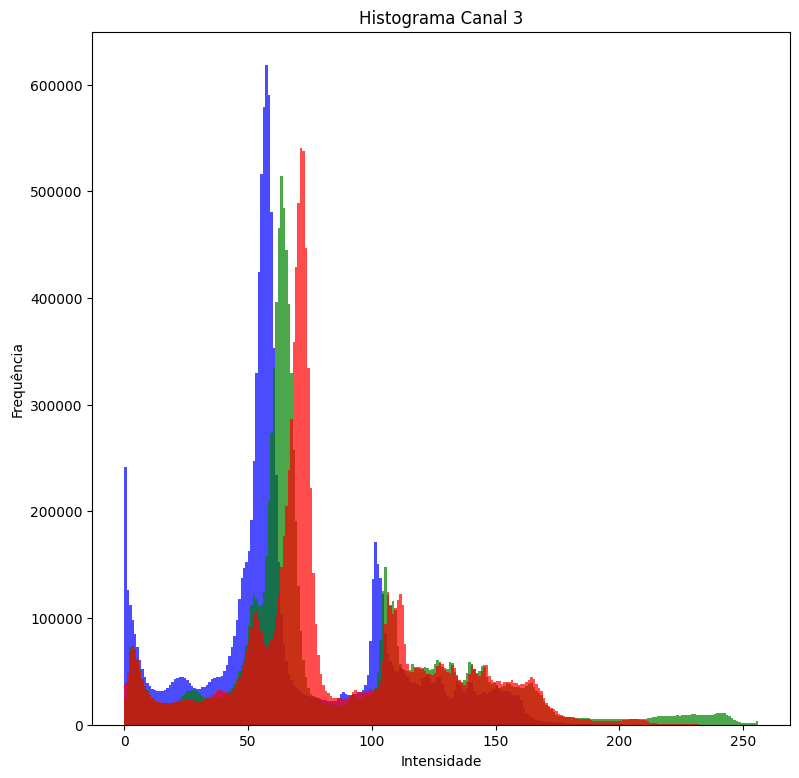

Tamanho da Imagem: (4032, 3024)
Gamute: 255
Gráfico de histograma salvo em:
- ./Graficos/Objeto/histograma.jpg
Color: (64, 64, 64) - Area: 17.71%
Color: (64, 64, 128) - Area: 1.22%
Color: (64, 128, 128) - Area: 2.97%
Color: (128, 128, 128) - Area: 9.02%
Color: (64, 128, 64) - Area: 0.71%
Color: (64, 192, 128) - Area: 1.47%
Color: (128, 192, 128) - Area: 0.09%
Color: (0, 64, 64) - Area: 20.64%
Color: (0, 128, 64) - Area: 2.68%
Color: (0, 64, 0) - Area: 0.85%
Color: (0, 128, 128) - Area: 0.13%
Color: (0, 192, 128) - Area: 1.63%
Color: (0, 192, 64) - Area: 0.11%
Color: (0, 0, 0) - Area: 23.64%
Color: (128, 192, 192) - Area: 0.14%
Color: (64, 192, 192) - Area: 0.01%
Color: (0, 0, 64) - Area: 16.26%
Color: (192, 192, 192) - Area: 0.05%
Color: (64, 64, 0) - Area: 0.00%
Color: (0, 64, 128) - Area: 0.05%
Color: (64, 192, 64) - Area: 0.00%
Color: (64, 64, 192) - Area: 0.11%
Color: (64, 128, 192) - Area: 0.48%
Color: (0, 128, 0) - Area: 0.00%
Color: (0, 0, 128) - Area: 0.00%
Color: (64, 0, 128) 

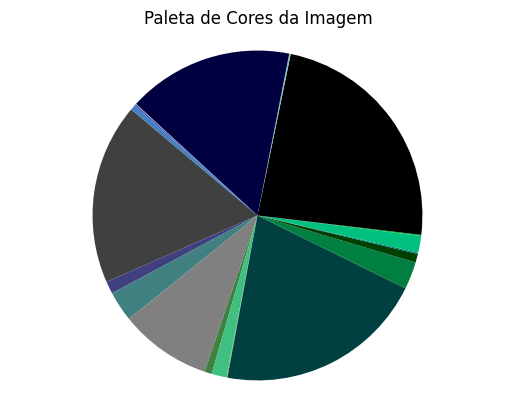

In [23]:
obter_caracteristicas_e_histogramas(object, './Graficos/Objeto/')
image_processor = ImageProcessor(object_path)
image_processor.process_image_with_palette_chart(image_processor.reduce_color_quantization,
                                                 path_chart= './Graficos/Objeto/objeto.png')
decomposicao_RGB(object_path, './Graficos/Objeto/decomposicao')


## Realce de Contraste

In [24]:
realce_contraste_path = './Graficos/Objeto/realce_contraste.png'
realce_contraste(object, realce_contraste_path)
realce_contraste_img =  cv2.imread(realce_contraste_path)
mostrar_imagem(realce_contraste_img, 'realce contraste')

# Documento

In [25]:
document_path = './images/doc.jpg'
doc = cv2.imread(document_path)
mostrar_imagem(object, 'doc')

## Características da Imagem

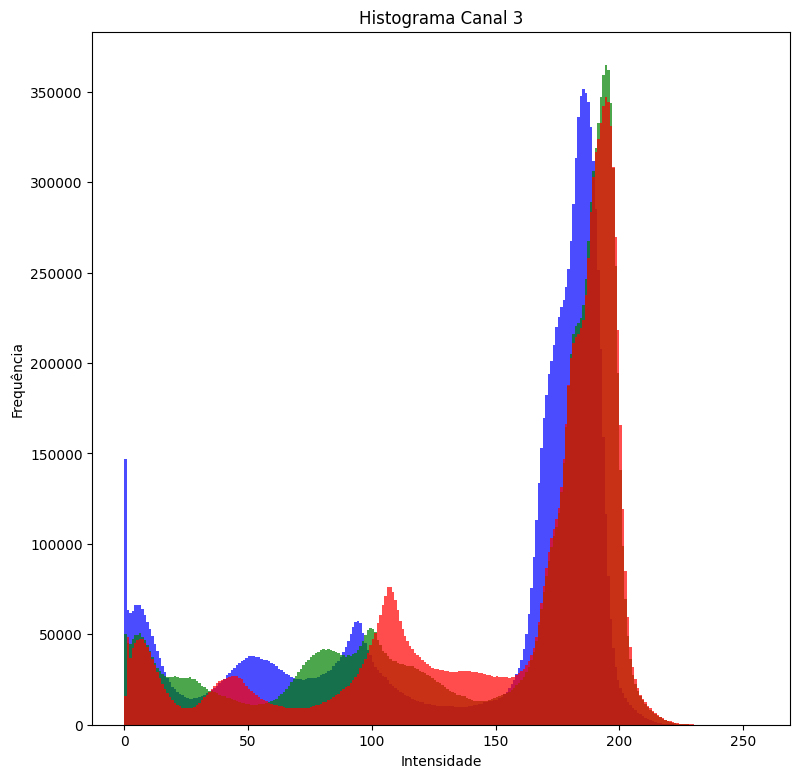

Tamanho da Imagem: (4032, 3024)
Gamute: 242
Gráfico de histograma salvo em:
- ./Graficos/Doc/histograma.jpg
Color: (0, 0, 0) - Area: 11.53%
Color: (0, 0, 64) - Area: 1.06%
Color: (0, 0, 128) - Area: 0.04%
Color: (0, 64, 64) - Area: 5.66%
Color: (64, 64, 64) - Area: 9.67%
Color: (64, 64, 128) - Area: 3.43%
Color: (0, 64, 128) - Area: 0.00%
Color: (64, 128, 128) - Area: 1.37%
Color: (128, 128, 128) - Area: 40.43%
Color: (128, 192, 128) - Area: 0.93%
Color: (128, 192, 192) - Area: 17.44%
Color: (192, 192, 192) - Area: 6.98%
Color: (192, 128, 128) - Area: 0.00%
Color: (128, 64, 64) - Area: 0.02%
Color: (128, 128, 64) - Area: 0.00%
Color: (64, 64, 0) - Area: 0.00%
Color: (64, 0, 0) - Area: 0.02%
Color: (128, 128, 192) - Area: 1.38%
Color: (0, 64, 0) - Area: 0.02%
Color: (192, 192, 128) - Area: 0.00%
Color: (64, 128, 64) - Area: 0.01%
Color: (192, 128, 192) - Area: 0.00%
Color: (64, 0, 64) - Area: 0.00%
Color: (128, 64, 128) - Area: 0.00%
Color: (64, 0, 128) - Area: 0.00%


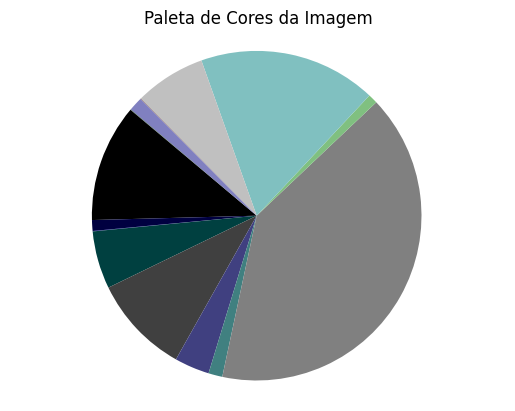

In [26]:
obter_caracteristicas_e_histogramas(doc, './Graficos/Doc/')
image_processor = ImageProcessor(document_path)
image_processor.process_image_with_palette_chart(image_processor.reduce_color_quantization,
                                                 path_chart= './Graficos/Doc/Paleta.png')
decomposicao_RGB(document_path, './Graficos/Doc/decomposicao')



## Realce de Contraste

In [27]:
realce_contraste_path = './Graficos/Doc/realce_contraste.png'
realce_contraste(doc, realce_contraste_path)
realce_contraste_img =  cv2.imread(realce_contraste_path)
mostrar_imagem(realce_contraste_img, 'realce contraste')